<a href="https://colab.research.google.com/github/neSTORY/MiniProject/blob/master/penguin_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt

[Dacon](https://dacon.io/competitions/official/235862/data)에서 로컬로 받지 않고 바로 colab으로 사용하기 위한 코드입니다.

<u>데이터 다운 시 google drive로 공유하시면 colab에서 편리하게 사용하실 수 있습니다.

In [2]:
zip_data = "/content/drive/MyDrive/Colab Notebooks/dacon/penguin/dataset.zip" # zip 파일 저장경로
zip_folder = zipfile.ZipFile(zip_data)
zip_list = zip_folder.namelist()
zip_list # zip file 내 파일명 확인

['sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
# file to dataframe
submission = pd.read_csv(zip_folder.open(zip_list[0]))
test = pd.read_csv(zip_folder.open(zip_list[1]))
train = pd.read_csv(zip_folder.open(zip_list[2]))

In [4]:
# check train dataframe
train.head(10)
# id 컬럼은 행 번호를 위한 컬럼이므로 나중에 삭제해주자

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
5,5,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,51.1,16.5,225,MALE,8.20660,-26.36863,5250
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
7,7,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,46.4,18.6,190,FEMALE,9.32105,-24.64162,3450
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
9,9,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.7,15.0,216,FEMALE,8.53018,-26.72751,4750


In [5]:
submission

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
223,223,0
224,224,0
225,225,0
226,226,0


In [6]:
# check train.info / train.describe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,114.0,56.500000,33.052988,0.00000,28.250000,56.50000,84.750000,113.00000
Culmen Length (mm),114.0,44.613158,5.321829,33.50000,40.325000,45.20000,49.075000,55.10000
Culmen Depth (mm),114.0,17.014912,1.941363,13.20000,15.225000,17.25000,18.600000,21.10000
Flipper Length (mm),114.0,203.052632,14.653425,174.00000,190.000000,199.00000,216.000000,231.00000
Delta 15 N (o/oo),111.0,8.737634,0.567698,7.63220,8.272585,8.63259,9.264635,10.02544
Delta 13 C (o/oo),111.0,-25.723051,0.859786,-27.01854,-26.434025,-25.95541,-25.005945,-24.10255
Body Mass (g),114.0,4327.850877,781.766484,2700.00000,3675.000000,4250.00000,4850.000000,6300.00000


Categorical columns : ["Species", "Island", "Clutch Completion", "Sex"]

In [8]:
# [train / test] 데이터셋에 null 값이 있는지 확인해보자!

na_list = []  # 있다가 결측치 채울때 쓸 리스트

def check_na(df):
  for k, v in (df.isna().sum()>0).items():
    if v:
      na_list.append(k)
      print("['{}'] column has NaN ...!".format(k))
      print("Total number of NaN : {}\n".format(df[k].isna().sum()))

In [9]:
print("="*45)
print("[*] Check Train Dataset ...")
print("="*45)
check_na(train)
print("="*45)
print("[*] Check Test Dataset ...")
print("="*45)
check_na(test)

[*] Check Train Dataset ...
['Sex'] column has NaN ...!
Total number of NaN : 3

['Delta 15 N (o/oo)'] column has NaN ...!
Total number of NaN : 3

['Delta 13 C (o/oo)'] column has NaN ...!
Total number of NaN : 3

[*] Check Test Dataset ...
['Sex'] column has NaN ...!
Total number of NaN : 6

['Delta 15 N (o/oo)'] column has NaN ...!
Total number of NaN : 9

['Delta 13 C (o/oo)'] column has NaN ...!
Total number of NaN : 8



categorical / non categorical 에 따라 결측치를 채워보자

- categorical : ["Sex"]
- non categorical : ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

범주형 데이터는 삭제하고
연속형 데이터는 중위값/평균값으로 채워준다.

110여개 데이터는 너무 적은 데이터이다.

하나 하나 소중하기 때문에 시간남으면 "Sex"열을 분류로 결측치로 채워주고 확인해보자..

Text(0.5, 1.0, 'Delta 13 C')

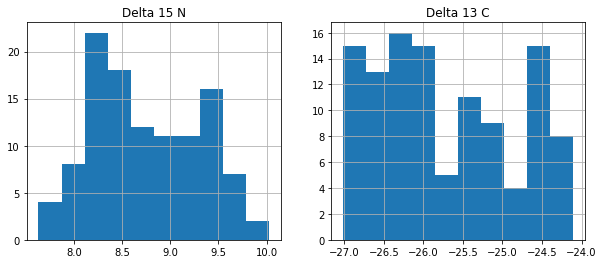

In [9]:
# 연속형 데이터 분포 확인
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
train["Delta 15 N (o/oo)"].hist()
plt.title("Delta 15 N")
plt.subplot(1,2,2)
train["Delta 13 C (o/oo)"].hist()
plt.title("Delta 13 C")

둘 다 분포가 고르지 않으므로 평균으로 넣어보자

In [15]:
# 아까 append를 train, test 두 번 진행했기 때문에 중복을 제거하자
na_list = list(set(na_list))
na_list

['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex']

In [17]:
def fill_na(df):
  for na in na_list:
    if df[na].dtype == "object":
      pass
    else:
      df[na] = df[na].fillna(df[na].mean()) # 연속형 데이터 처리
  return df

In [18]:
train = fill_na(train)
test = fill_na(test)

print("train's na : {}".format(sum(train.isna().sum())))
print("test's na : {}".format(sum(test.isna().sum())))

train's na : 3
test's na : 6


In [67]:
X_train_sex = train[train["Sex"].notna()]
y_train_sex = train[train["Sex"].isna()]

X_test_sex = test[test["Sex"].notna()]
y_test_sex = test[test["Sex"].notna()]

In [68]:
X_train_sex["Sex"] = np.where(X_train_sex["Sex"]=="MALE", 1, 0)
X_test_sex["Sex"] = np.where(X_test_sex["Sex"]=="MALE", 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
X_train_sex = pd.get_dummies(X_train_sex)
X_test_sex = pd.get_dummies(X_test_sex)

In [72]:
X_train_sex.shape, X_test_sex.shape

((111, 16), (222, 15))

In [71]:
# 랜덤포레스트 분류를 통해 Sex열의 결측치를 채워보겠습니다.
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_sex, y_train_sex)

ValueError: ignored

In [21]:
# train 데이터셋에서 타겟열을 분리하자
X_train = train.drop("id", axis=1)
y_train = train["id"]
X_test = test.copy()

In [26]:
X_train.shape, X_test.shape, y_train.shape

((111, 16), (222, 16), (111,))

In [23]:
# 범주형 데이터를 get_dummies를 통해 수치형으로 바꿔주자
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [24]:
# 선형회귀를 통해 학습을 진행하자
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
lr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- Body Mass (g)

  warnings.warn(message, FutureWarning)


array([1368.48019792, 1444.99709354, 1312.52456735, 1286.99697446,
       1195.66891431, 1280.72697681, 1380.49338834, 1388.52481015,
       1393.73701953, 1236.78265147, 1371.43933302, 1381.82051547,
       1417.4008552 , 1396.47895306, 1369.44169174, 1410.49210722,
       1298.74655045, 1285.28125706, 1337.44861325, 1349.56879516,
       1316.14379943, 1479.65394674, 1415.94448563, 1332.04353899,
       1228.7613615 , 1384.63007022, 1326.22653878, 1328.22584319,
       1305.34196847, 1362.49483164, 1303.33926901, 1437.54042433,
       1253.41334908, 1419.61043019, 1258.24825799, 1227.91266997,
       1321.07818291, 1269.40414605, 1275.33416583, 1361.11571726,
       1384.67941655, 1317.49045207, 1314.53235162, 1425.45537571,
       1333.85848156, 1365.04570689, 1328.19026888, 1402.53683441,
       1474.75049891, 1393.81129739, 1277.54116138, 1327.09717147,
       1299.00711365, 1330.47347394, 1296.35699286, 1370.65685811,
       1280.04790601, 1414.89213562, 1307.19899361, 1253.57270